In [1]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_x = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Survived'], axis=1)
data_y = df.Survived

In [7]:
data_x.describe()

,Pclass,Age,Fare
count,891.000000,714.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,20.125000,7.910400
50%,3.000000,28.000000,14.454200
75%,3.000000,38.000000,31.000000
max,3.000000,80.000000,512.329200


In [10]:
data_x.Age = data_x.Age.fillna(data_x.Age.mean())
data_x['Sex'] = data_x['Sex'].map({'male': 1, 'female': 2})

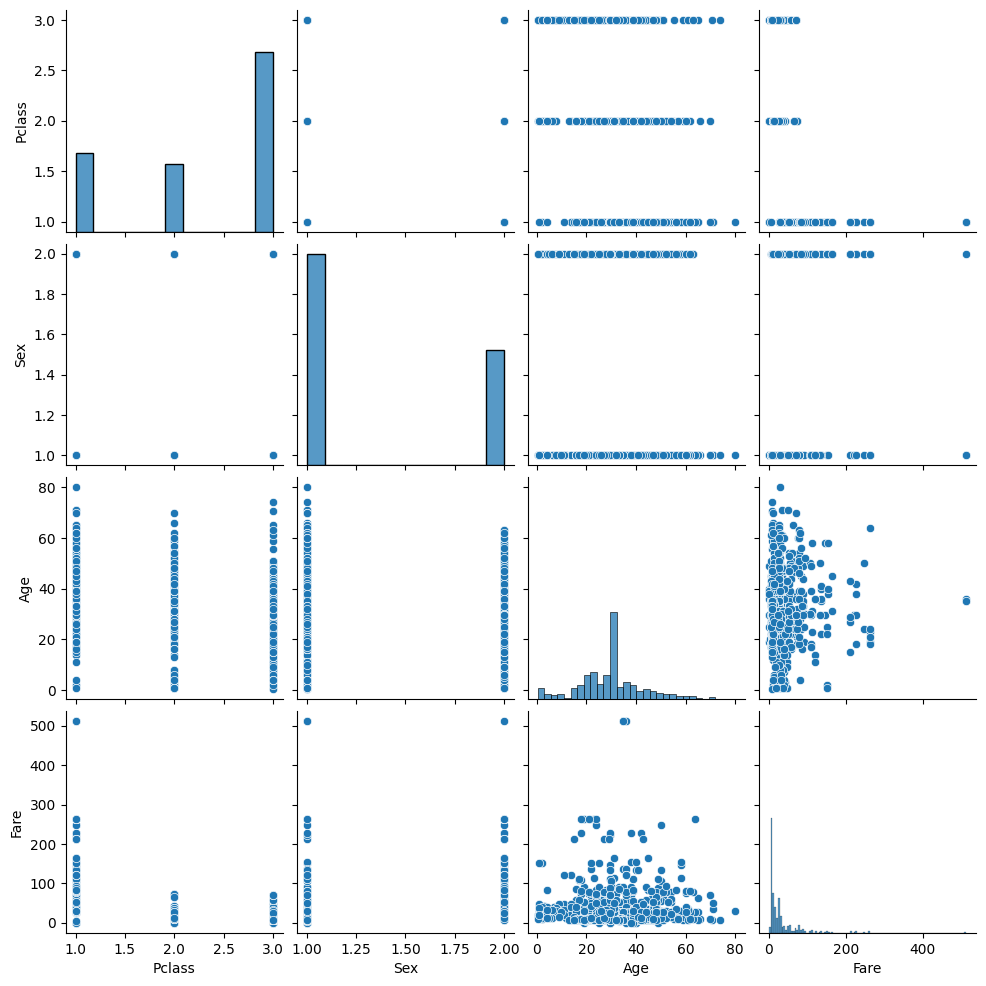

In [20]:
sns.pairplot(data_x) # hue es la columna que se usa como referencia para el dibujo del grafico

In [21]:
forest = RandomForestClassifier()

In [22]:
forest.fit(data_x, data_y)

RandomForestClassifier()

In [25]:
print(f'El score del modelo es: {round(forest.score(data_x, data_y), 4) *100}%')

El score del modelo es: 97.98%


In [31]:
genre = ['None', 'masculino', 'femenino']
level = ['None', '1era. clase', '2da. clase', '3era. clase']
state = ['murió', 'vivió']

def titanic_passenger_classify(model, age, sex, fare, pclass):
    predicted = model.predict([[pclass, sex, age, fare]])
    print(f'El/la pasajero(a) de sexo {genre[sex]}, de {age} años, perteneciente a {level[pclass]} y que pagó {fare} libras: {state[predicted[0]]} en el accidente.')

In [36]:
titanic_passenger_classify(forest, 24, 2, 120, 1)

El/la pasajero(a) de sexo femenino, de 24 años, perteneciente a 1era. clase y que pagó 120 libras: vivió en el accidente.


d:\NUR\2023-II\Algorítmica Avanzada\repository\algoritmica-2023-2\pandas_intro\pandas_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
